In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
!pip install imbalanced-Learn

Defaulting to user installation because normal site-packages is not writeable


# About the Dataset

Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric) 
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  
  3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
  4 - education (categorical: "unknown","secondary","primary","tertiary")
  
  5 - default: has credit in default? (binary: "yes","no")
  
  6 - balance: average yearly balance, in euros (numeric) 
  
  7 - housing: has housing loan? (binary: "yes","no")
  
  8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")



In [3]:
df=pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\bank-full.csv",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#This variables are not required
df.drop(['duration','pdays','previous','contact'],inplace=True,axis=1)

In [8]:
df.shape

(45211, 13)

In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
campaign     0
poutcome     0
y            0
dtype: int64

In [10]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
balance: [ 2143    29     2 ...  8205 14204 16353]
housing: ['yes' 'no']
loan: ['no' 'yes']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
poutcome: ['unknown' 'failure' 'other' 'success']
y: [

In [11]:
df['default']=df['default'].map({'yes':0,'no':1})

In [12]:
df['housing']=df['housing'].map({'yes':0,'no':1})

In [13]:
df['loan']=df['loan'].map({'yes':0,'no':1})

In [14]:
df['y']=df['y'].map({'yes':0,'no':1})

In [15]:
df=pd.get_dummies(df, columns=['job'])

In [16]:
df=pd.get_dummies(df, columns=['marital'])

In [17]:
df=pd.get_dummies(df, columns=['education'])

In [18]:
df=pd.get_dummies(df, columns=['month'])

In [19]:
df=pd.get_dummies(df, columns=['campaign'])

In [20]:
df=pd.get_dummies(df, columns=['poutcome'])

In [21]:
df

,age,default,balance,housing,loan,day,y,job_admin.,job_blue-collar,job_entrepreneur,...,campaign_46,campaign_50,campaign_51,campaign_55,campaign_58,campaign_63,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,2143,0,1,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,1,29,0,1,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,1,2,0,0,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,47,1,1506,0,1,5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,33,1,1,1,1,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,1,1,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,71,1,1729,1,1,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,1,5715,1,1,17,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,57,1,668,1,1,17,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df['y'].value_counts()

1    39922
0     5289
Name: y, dtype: int64

Here the data is imbalanced so to balance the data we are using SMOTE.

# Balancing the data by Smote

In [23]:
X = df.drop('y',axis='columns')
Y = df['y']

In [24]:
Y.value_counts()

1    39922
0     5289
Name: y, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
#X_sm, y_sm = smote.fit_sample(X,y)

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

Y.value_counts()


1    39922
0    39922
Name: y, dtype: int64

# Logistic Regression and fit the model

In [26]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
classifier.coef_

array([[-5.03650346e-02, -2.15995859e+00, -2.50387936e-05,
         1.55324104e-01, -1.28327706e+00, -1.47212539e-02,
         1.26051056e+00,  1.86507631e+00,  6.69162913e-01,
         6.32620406e-01,  1.59754427e+00,  7.83567933e-01,
         6.20159404e-01,  1.15746360e+00, -1.11822504e-02,
         1.60049226e+00,  4.55898152e-01,  1.84137246e-01,
         2.12680060e+00,  2.07502203e+00,  7.55035771e-01,
         2.35757334e+00,  1.40505467e+00,  1.60680286e+00,
         8.90812283e-01,  7.85080621e-01,  1.93325322e+00,
         3.96302178e-02,  9.89140173e-01,  8.82234816e-01,
         1.92533966e+00,  1.74343629e+00, -3.24303900e-02,
         2.75848669e+00,  1.75582544e+00,  1.00257479e-01,
         4.65882855e-02,  1.32006957e+00,  1.96197909e+00,
         1.64712814e+00,  1.35838515e+00,  8.21629927e-01,
         6.46284640e-01,  3.86242624e-01,  2.87195792e-01,
         1.71320277e-01,  1.45119133e-01,  1.04235988e-01,
         9.09333376e-02,  7.08491977e-02,  4.99669364e-0

In [28]:
classifier.intercept_

array([-2.37657632])

# Predict the X dataset

In [29]:
y_pred=classifier.predict(X)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
classifier.predict_proba(X)

array([[0.06356343, 0.93643657],
       [0.12682814, 0.87317186],
       [0.01542949, 0.98457051],
       ...,
       [0.83905175, 0.16094825],
       [0.98221128, 0.01778872],
       [0.9985827 , 0.0014173 ]])

In [31]:
classifier.predict_proba(X)[:,1]

array([0.93643657, 0.87317186, 0.98457051, ..., 0.16094825, 0.01778872,
       0.0014173 ])

In [32]:
y_pred_df = pd.DataFrame({'Actual':Y,
                         'Prob':classifier.predict_proba(X)[:,1],
                         'Predicted':classifier.predict(X)})

In [33]:
y_pred_df

,Actual,Prob,Predicted
0,1,0.936437,1
1,1,0.873172,1
2,1,0.984571,1
3,1,0.943297,1
4,1,0.670123,1
...,...,...,...
79839,0,0.000432,0
79840,0,0.132521,0
79841,0,0.160948,0
79842,0,0.017789,0


# Comparision

In [34]:
y_pred_df['correct']=y_pred_df['Actual'] == y_pred_df['Predicted']
y_pred_df

,Actual,Prob,Predicted,correct
0,1,0.936437,1,True
1,1,0.873172,1,True
2,1,0.984571,1,True
3,1,0.943297,1,True
4,1,0.670123,1,True
...,...,...,...,...
79839,0,0.000432,0,True
79840,0,0.132521,0,True
79841,0,0.160948,0,True
79842,0,0.017789,0,True


In [35]:
y_pred_df[y_pred_df['correct']==True]

,Actual,Prob,Predicted,correct
0,1,0.936437,1,True
1,1,0.873172,1,True
2,1,0.984571,1,True
3,1,0.943297,1,True
4,1,0.670123,1,True
...,...,...,...,...
79839,0,0.000432,0,True
79840,0,0.132521,0,True
79841,0,0.160948,0,True
79842,0,0.017789,0,True


In [36]:
y_pred_df[y_pred_df['correct']==False]

,Actual,Prob,Predicted,correct
83,0,0.890503,1,False
86,0,0.921279,1,False
87,0,0.966731,1,False
129,0,0.899436,1,False
168,0,0.967728,1,False
...,...,...,...,...
79676,0,0.826838,1,False
79793,0,0.638278,1,False
79803,0,0.515265,1,False
79810,0,0.662432,1,False


In [37]:
y_pred_df['correct'].value_counts()

True     72617
False     7227
Name: correct, dtype: int64

In [38]:
y_pred_df['correct'].mean()

0.9094859976955062

# Confusion Matrix

In [39]:
confusion_matrix=confusion_matrix(Y,y_pred)

<AxesSubplot:>

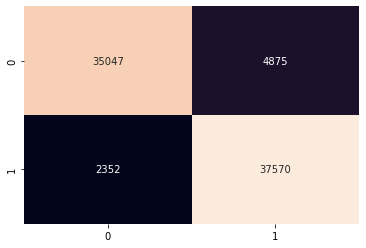

In [40]:
sns.heatmap(confusion_matrix,annot=True,fmt='d',cbar=False)

# Classification Report

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     39922
           1       0.89      0.94      0.91     39922

    accuracy                           0.91     79844
   macro avg       0.91      0.91      0.91     79844
weighted avg       0.91      0.91      0.91     79844



# ROC Curve

In [43]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
79839    0
79840    0
79841    0
79842    0
79843    0
Name: y, Length: 79844, dtype: int64

In [44]:
classifier.predict_proba(X)

array([[0.06356343, 0.93643657],
       [0.12682814, 0.87317186],
       [0.01542949, 0.98457051],
       ...,
       [0.83905175, 0.16094825],
       [0.98221128, 0.01778872],
       [0.9985827 , 0.0014173 ]])

In [45]:
classifier.predict_proba(X)[:,1]

array([0.93643657, 0.87317186, 0.98457051, ..., 0.16094825, 0.01778872,
       0.0014173 ])

In [46]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])

In [47]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99969941, 0.99974951,
       1.        ])

In [48]:
tpr

array([0.00000000e+00, 2.50488452e-05, 1.32758880e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [49]:
thresholds

array([1.99980739e+00, 9.99807389e-01, 9.99044872e-01, ...,
       3.84491774e-05, 3.54714037e-05, 6.71754143e-06])

In [50]:
pd.DataFrame({'False Positive Rate':fpr,
             'True Positive Rate':tpr,
             'Thresholds':thresholds})

,False Positive Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,1.999807
1,0.000000,0.000025,0.999807
2,0.000000,0.001328,0.999045
3,0.000025,0.001328,0.999045
4,0.000025,0.001353,0.999032
...,...,...,...
18505,0.998372,1.000000,0.000081
18506,0.998422,1.000000,0.000081
18507,0.999699,1.000000,0.000038
18508,0.999750,1.000000,0.000035


In [51]:
auc=roc_auc_score(Y,y_pred)
auc

0.9094859976955062

Text(0.5, 1.0, 'logit model (area = 0.91)')

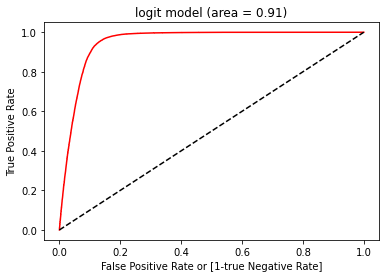

In [52]:
plt.plot(fpr, tpr, color='red')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1-true Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

### Here Area Under Curve is 0.91 which is showimg that the model is predicting very well. The model is distinguishing very well between classes.